<a href="https://colab.research.google.com/github/risacarvalho14/LGMVIP-DataScience/blob/main/Stock_market_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author - Risa Carvalho**

Stock market 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import io
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['NSE-TATAGLOBAL.csv']))
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [8]:
df['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

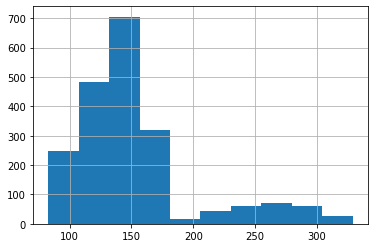

In [9]:
df['High'].hist()

<Figure size 1800x360 with 0 Axes>

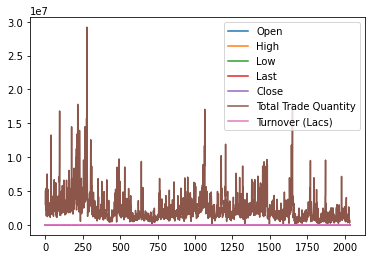

In [10]:
plt.figure(figsize =(25, 5))
df.plot()

In [11]:
df_set = df.filter(['Close'])
dataset = df.values
training_data_len=math.ceil(len(df) * 8)
training_data_len

16280

In [12]:
df = df.iloc[:, 0:4]
df

,Date,Open,High,Low
0,2018-09-28,234.05,235.95,230.20
1,2018-09-27,234.55,236.80,231.10
2,2018-09-26,240.00,240.00,232.50
3,2018-09-25,233.30,236.75,232.00
4,2018-09-24,233.55,239.20,230.75
...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00
2031,2010-07-26,120.10,121.00,117.10
2032,2010-07-23,121.80,121.95,120.25
2033,2010-07-22,120.30,122.00,120.25


In [13]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [14]:
training_set = df.iloc[:, 1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 2))
df_training_scaled = scaler.fit_transform(training_set)

In [16]:
labels = []
features_set = []
for i in range(60, 580):
  features_set.append(df_training_scaled[i - 60:i, 0])
  labels.append(df_training_scaled[i, 0])

In [17]:
features_set, labels = np.array(features_set), np.array(labels)

In [18]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1],1))

In [19]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [20]:
model = Sequential()

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(features_set, labels, epochs=60, batch_size=30)

Epoch 1/60
18/18 [==============================] - 0s 842us/step - loss: 0.0476
Epoch 2/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 3/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 4/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 5/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 6/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 7/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 8/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 9/60
18/18 [==============================] - 0s 942us/step - loss: 0.0476
Epoch 10/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 11/60
18/18 [==============================] - 0s 1ms/step - loss: 0.0476
Epoch 12/60
18/18 [==============================] - 0s 945us/step - loss: 0.0476
Epoch 13/60
18/18 [========================

In [23]:
from google.colab import files
uploaded = files.upload()


Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL (1).csv


In [24]:
df_testing_complete = pd.read_csv(io.BytesIO(uploaded['NSE-TATAGLOBAL.csv']))
df_testing_processed = df_testing_complete.iloc[:, 1:2]
df_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


## **Prediction Of Data**

In [25]:
df_total = pd.concat((df["Open"],df["Open"]), axis = 0)
test_inputs = df_total[len(df_total) - len(df) - 50:].values
test_inputs.shape

(2085,)

In [26]:
test_inputs = test_inputs.reshape(-1 , 1)
test_inputs = scaler.transform(test_inputs)

In [27]:
test_feature = []
for i in range(50, 85):
  test_feature.append(test_inputs[i-50: i , 0])

In [28]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1750, 1)

In [29]:
predictions = model.predict(test_feature)

In [30]:
predictions

array([[0.34225467],
       [0.35279804],
       [0.36699107],
       ...,
       [1.2668289 ],
       [1.2615572 ],
       [1.2664233 ]], dtype=float32)

In [31]:
x_train = df[0: 1240]
y_train = df[1:1239]
print(x_train.shape)
print(y_train.shape)


(1240, 4)
(1238, 4)


In [32]:
x_train

,Date,Open,High,Low
0,2018-09-28,234.05,235.95,230.20
1,2018-09-27,234.55,236.80,231.10
2,2018-09-26,240.00,240.00,232.50
3,2018-09-25,233.30,236.75,232.00
4,2018-09-24,233.55,239.20,230.75
...,...,...,...,...
1235,2013-09-27,146.00,149.90,145.50
1236,2013-09-26,145.90,147.40,143.25
1237,2013-09-25,144.50,146.65,143.75
1238,2013-09-24,143.25,146.45,142.50


In [34]:
np.random.seed(2)
np.random.randn(3,3)

array([[-0.41675785, -0.05626683, -2.1361961 ],
       [ 1.64027081, -1.79343559, -0.84174737],
       [ 0.50288142, -1.24528809, -1.05795222]])

In [36]:
np.random.normal(5)

5.551454044546424

In [37]:
np.random.normal(1)

3.2922080128149576

In [38]:
np.random.normal(size = 1500, scale = 100).std()

99.41365552444185

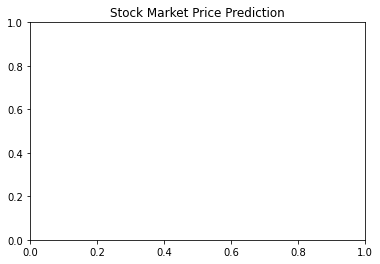

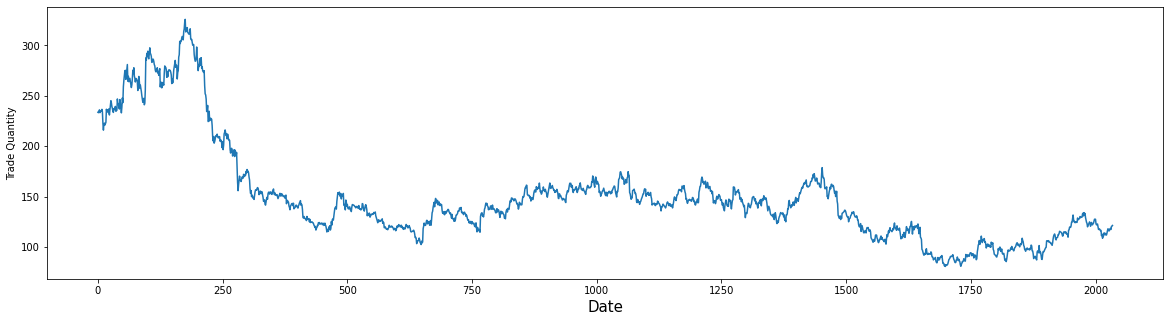

In [40]:
plt.title("Stock Market Price Prediction")
plt.figure(figsize = (20,5))
plt.plot(df_testing_complete['Close'])
plt.ylabel("Trade Quantity")
plt.xlabel("Date", fontsize = 15)
plt.show()

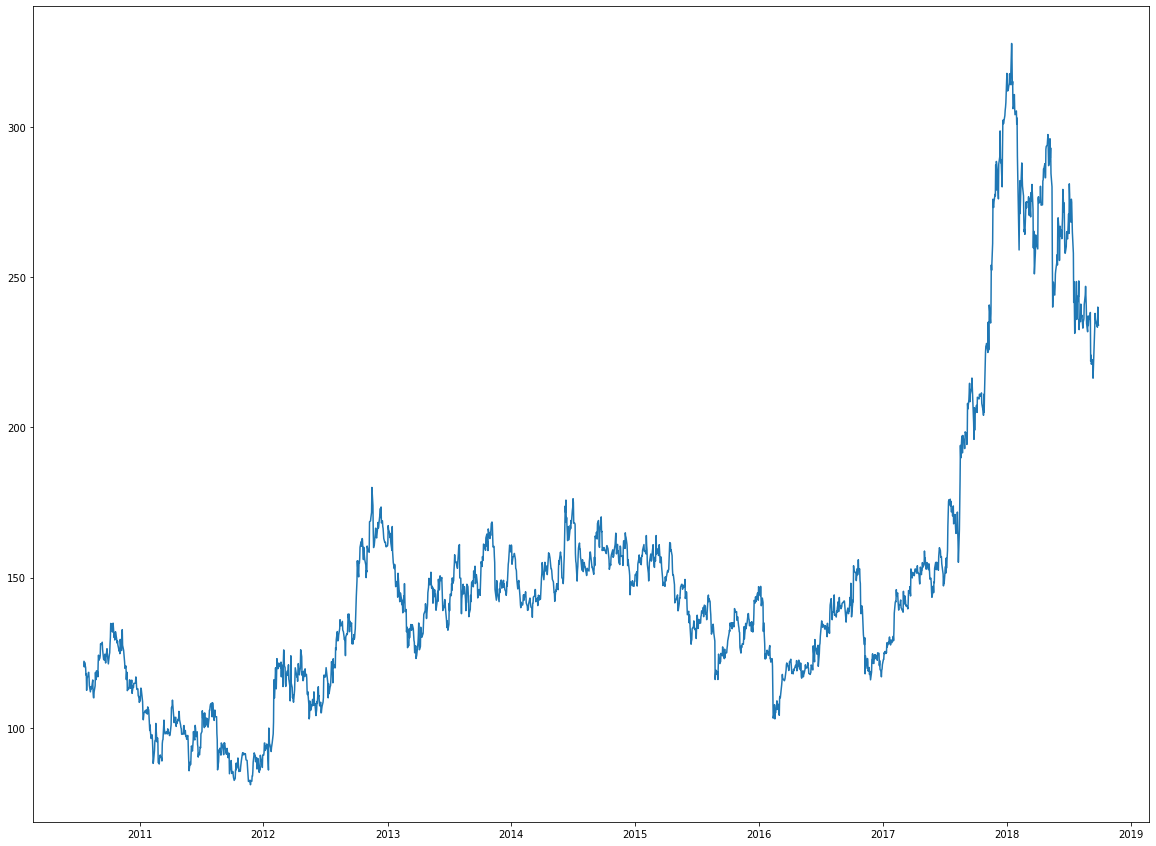

In [41]:
df["Date"] = pd.to_datetime(df.Date)
df.index = df["Date"]
plt.figure(figsize = (20 , 15))
plt.plot(df["Open"] , label = 'ClosePriceHist')

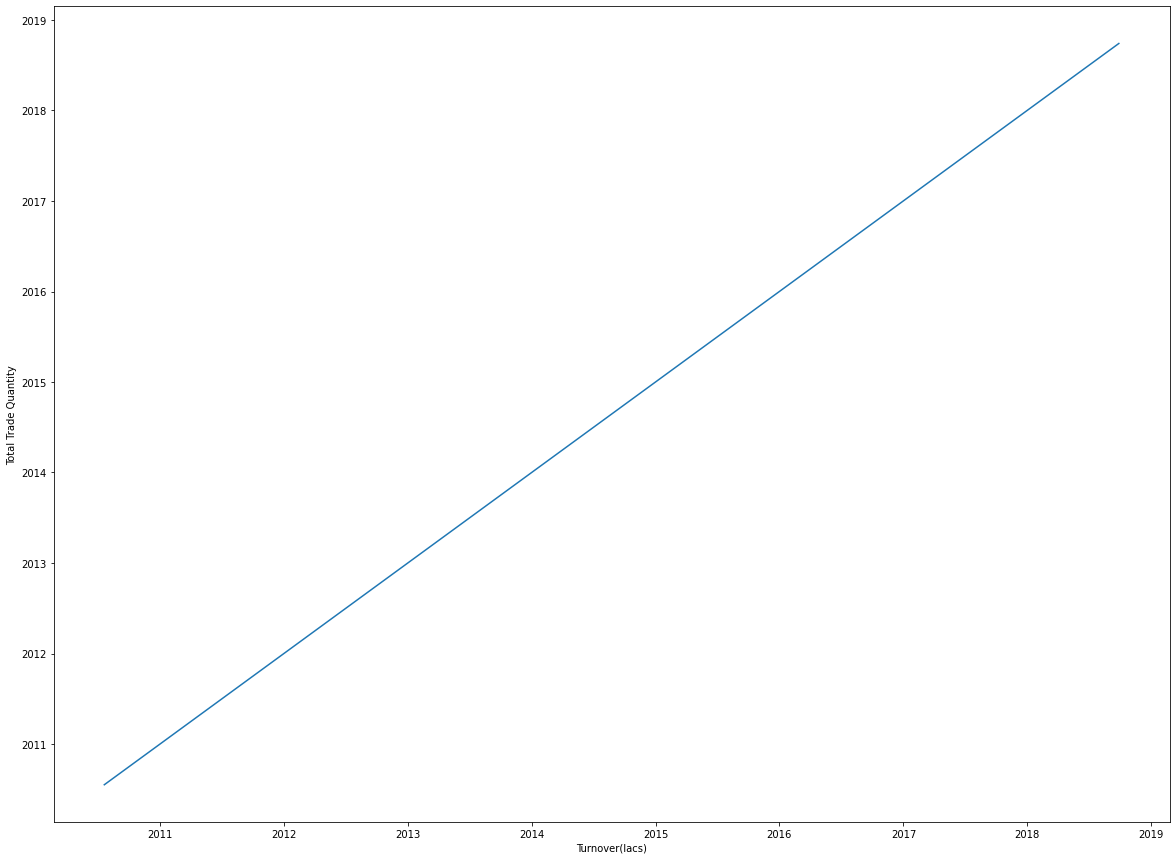

In [42]:
plt.figure(figsize=(20,15))
plt.plot(df['Date'])
plt.xlabel('Turnover(lacs)')
plt.ylabel('Total Trade Quantity')
plt.show()

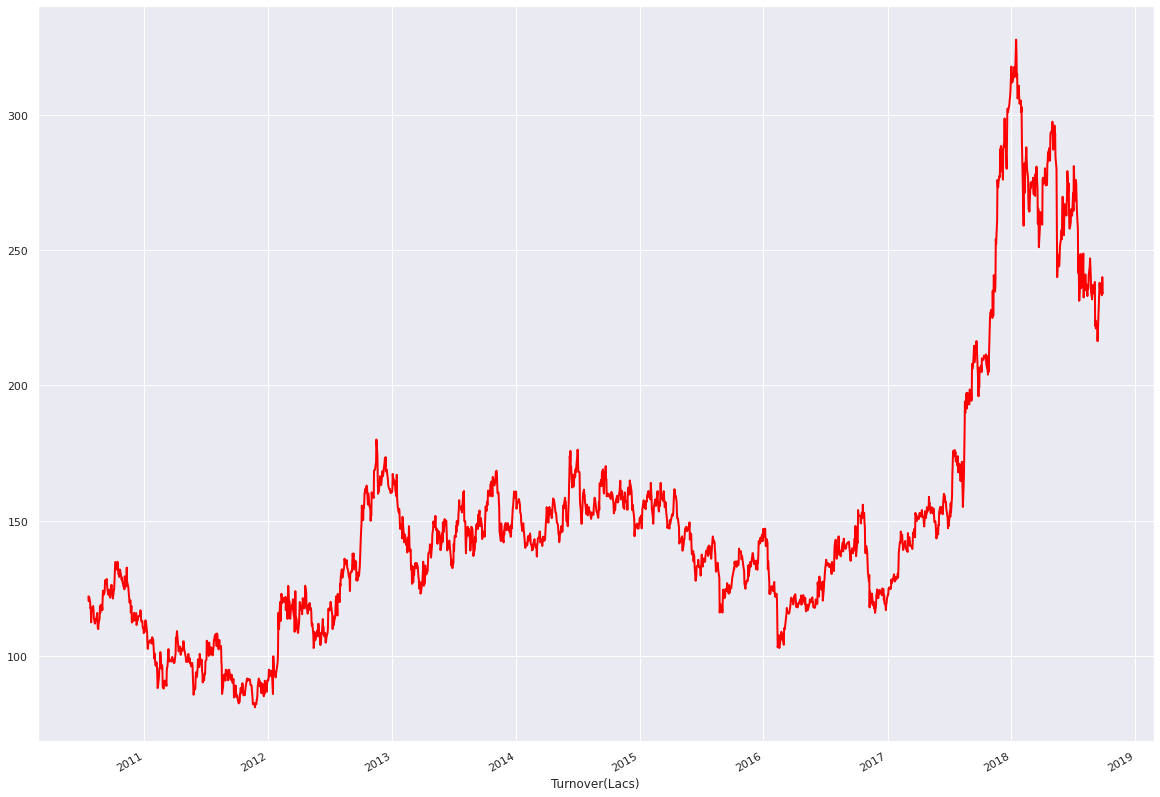

In [44]:
sns.set(rc = {'figure.figsize' : (20, 15)})
df['Open'].plot(linewidth = 2 , color = 'Red')

In [45]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Turnover(Lacs)'], dtype='object')

In [48]:
from google.colab import files
uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL (2).csv


In [49]:
df = pd.read_csv(io.BytesIO(uploaded['NSE-TATAGLOBAL.csv']))
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


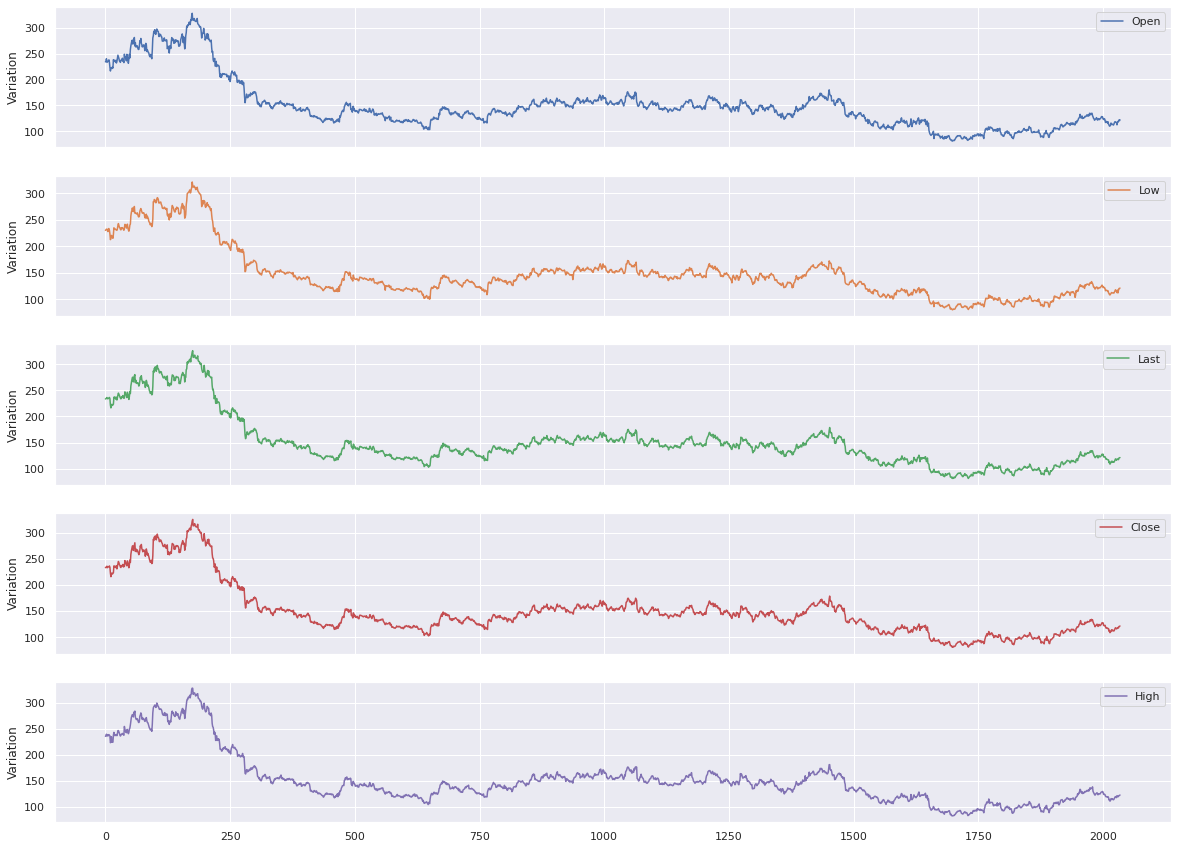

In [52]:
cols_plot = ['Open' , 'Low', 'Last' , 'Close' , 'High']
axes = df[cols_plot].plot(alpha = 1, figsize =(20, 15), subplots = True)
for ax in axes:
  ax.set_ylabel('Variation')

# **The** **End**